<a href="https://colab.research.google.com/github/Fredericqd2044/exceptions-examples/blob/master/exploringTiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterio.transform import from_origin
from pyproj import Transformer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 2.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ET Actual

Number of bands: 1
Band 1: Type=int16, Shape=(7721, 7581)


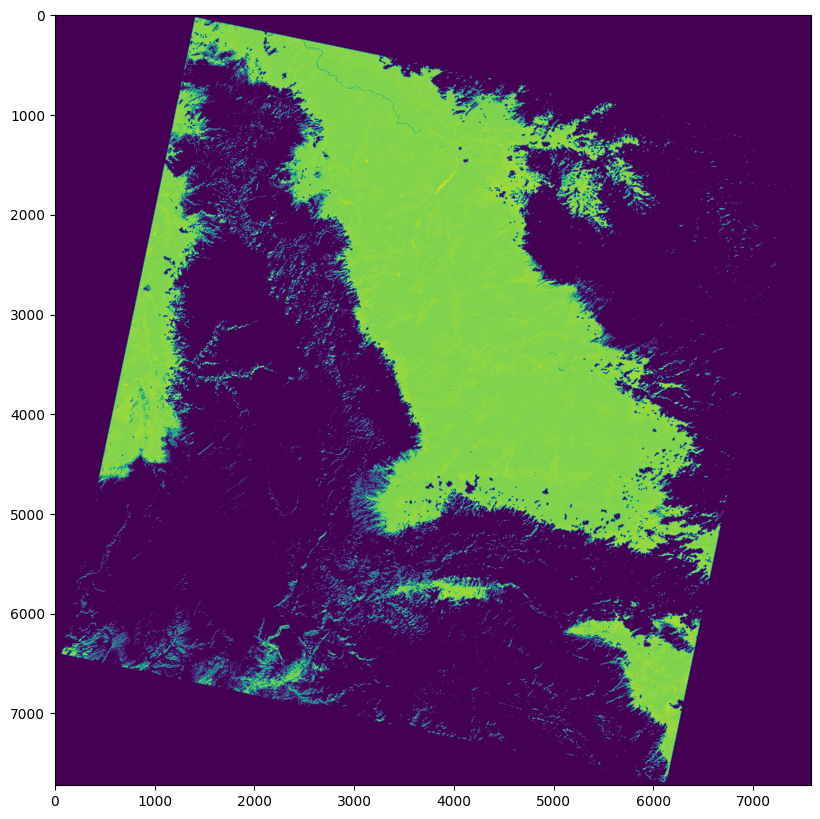

In [ ]:
# Path to your TIFF file
file_path = '/content/drive/My Drive/LC08_L2SP_035035_20160205_20200907_02_T1_ETA.tif'

# Open the TIFF file
with rasterio.open(file_path) as src:
    # Get the number of bands
    num_bands = src.count

    print(f"Number of bands: {num_bands}")

    # Loop through each band and print its type and dimensions
    for i in range(1, num_bands + 1):
        band = src.read(i)
        print(f"Band {i}: Type={band.dtype}, Shape={band.shape}")

        # Display the image
        plt.figure(figsize=(10, 10))
        show(band)

In [ ]:
with rasterio.open(file_path) as src:
  print(f"Coordinate Reference System (CRS): {src.crs}")
  print(f"Geographic Extent (Bounds): {src.bounds}")
  print(f"Dimensions: {src.width} x {src.height} pixels")
  print(f"Number of Bands: {src.count}")

  print()
  # Accessing metadata
  metadata = src.meta
  print("Metadata:", metadata)

  print()
  # Accessing band descriptions (if available)
  descriptions = src.descriptions
  print("Band Descriptions:", descriptions)


Coordinate Reference System (CRS): EPSG:32612
Geographic Extent (Bounds): BoundingBox(left=599385.0, bottom=3875085.0, right=826815.0, top=4106715.0)
Dimensions: 7581 x 7721 pixels
Number of Bands: 1

Metadata: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 7581, 'height': 7721, 'count': 1, 'crs': CRS.from_epsg(32612), 'transform': Affine(30.0, 0.0, 599385.0,
       0.0, -30.0, 4106715.0)}

Band Descriptions: ('Evapotranspiration actual',)


Based on the print out information, we understand that:

coordinate reference system here is: EPSG:32612

geographic bounds: (left=599385.0, bottom=3875085.0, right=826815.0, top=4106715.0)

width and height(dimensions): 7581 x 7721 pixels

The only band is 'Evapotranspiration actual'

# ET Uncertainty

In [ ]:
# Specific geographic location (latitude and longitude)
latitude = 36.345
longitude = -108.3456

# Open the TIFF file
with rasterio.open(file_path) as src:
    # CRS of the TIFF file
    tiff_crs = src.crs

    # Transformer to convert from WGS 84 (EPSG:4326) to TIFF's CRS (EPSG:32612)
    transformer = Transformer.from_crs("EPSG:4326", tiff_crs, always_xy=True)

    # Convert the geographic coordinates to the TIFF's coordinate system
    x, y = transformer.transform(longitude, latitude)

    # Convert from spatial coordinates to pixel coordinates
    row, col = src.index(x, y)

    # Access the pixel value at the specified location
    value = src.read(1)[row, col]
    print(f"The ETa value at location ({latitude}, {longitude}) is: {value}")

The ETa value at location (36.345, -108.3456) is: 42


Number of bands: 1
Coordinate Reference System (CRS): EPSG:32612
Geographic Extent (Bounds): BoundingBox(left=599385.0, bottom=3875085.0, right=826815.0, top=4106715.0)
Dimensions: 7581 x 7721 pixels
Number of Bands: 1

Metadata: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 7581, 'height': 7721, 'count': 1, 'crs': CRS.from_epsg(32612), 'transform': Affine(30.0, 0.0, 599385.0,
       0.0, -30.0, 4106715.0)}

Band Descriptions: ('Evapotranspiration Quantitative Uncertainty QA Band',)



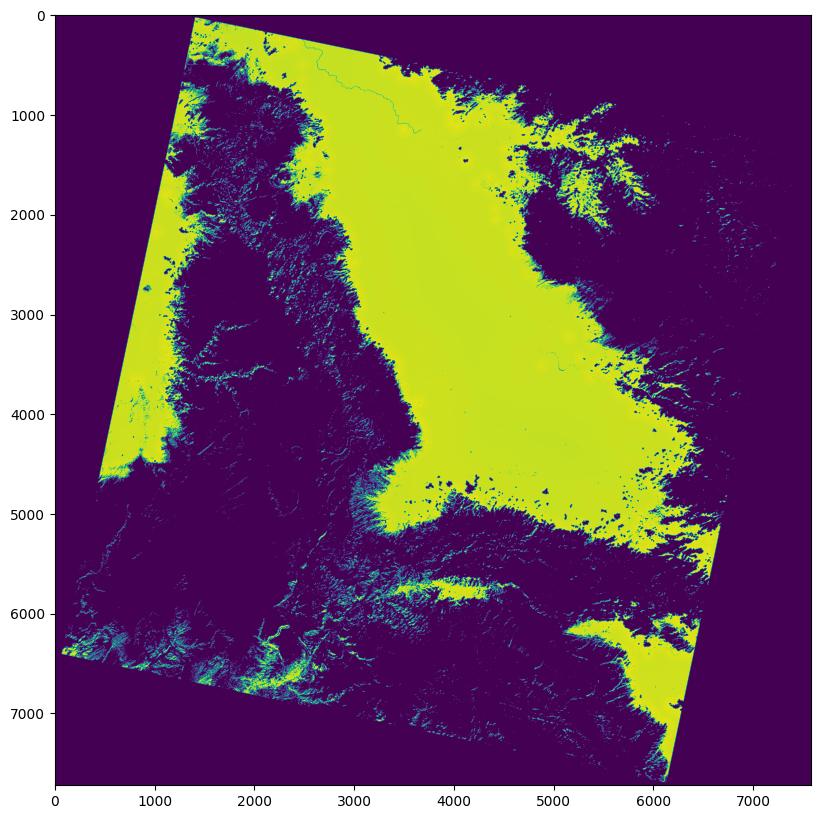

In [ ]:
# Path to your TIFF file
file_path_2 ='/content/drive/My Drive/LC08_L2SP_035035_20160205_20200907_02_T1_ETUN.tif'

# Open the TIFF file
with rasterio.open(file_path_2) as src:
    # Get the number of bands
    num_bands = src.count

    print(f"Number of bands: {num_bands}")

    print(f"Coordinate Reference System (CRS): {src.crs}")
    print(f"Geographic Extent (Bounds): {src.bounds}")
    print(f"Dimensions: {src.width} x {src.height} pixels")
    print(f"Number of Bands: {src.count}")

    print()
    # Accessing metadata
    metadata = src.meta
    print("Metadata:", metadata)

    print()
    # Accessing band descriptions (if available)
    descriptions = src.descriptions
    print("Band Descriptions:", descriptions)
    print()

    # Loop through each band and print its type and dimensions
    for i in range(1, num_bands + 1):
        band = src.read(i)

        # Display the image
        plt.figure(figsize=(10, 10))
        show(band)

In [ ]:
# Open the TIFF file
with rasterio.open(file_path_2) as src:
    # CRS of the TIFF file
    tiff_crs = src.crs

    # Transformer to convert from WGS 84 (EPSG:4326) to TIFF's CRS (EPSG:32612)
    transformer = Transformer.from_crs("EPSG:4326", tiff_crs, always_xy=True)

    # Convert the geographic coordinates to the TIFF's coordinate system
    x, y = transformer.transform(longitude, latitude)

    # Convert from spatial coordinates to pixel coordinates
    row, col = src.index(x, y)

    # Access the pixel value at the specified location
    value = src.read(1)[row, col]
    print(f"The ET Uncertainty value at location ({latitude}, {longitude}) is: {value}")

The ET Uncertainty value at location (36.345, -108.3456) is: 322
